In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV
csv_path = r"D:\CultureCircle-Scraper\CultureCircle-Scraper\Output\local_product_embeddings.xls"
df = pd.read_csv(csv_path)

# Extract embeddings from CSV (assuming emb_0 to emb_511)
embedding_cols = [f'emb_{i}' for i in range(512)]  # adjust if your embeddings have different dimensions
embeddings = df[embedding_cols].to_numpy()

# Function to find top N similar products
def find_similar_products(query_embedding, top_n=3):
    # Compute cosine similarity between query embedding and all product embeddings
    similarities = cosine_similarity([query_embedding], embeddings)[0]
    # Get top N indices
    top_indices = similarities.argsort()[-top_n:][::-1]
    # Return full product details for top results
    return df.iloc[top_indices]

# Example: use an embedding from the CSV itself as a "query"
query_example = embeddings[0]  # just for testing
top_products = find_similar_products(query_example, top_n=3)

# Display results
for idx, row in top_products.iterrows():
    print(f"Product Name: {row['product_name']}")
    print(f"Brand: {row['brand']}")
    print(f"Price: {row['price']}")
    print(f"Discounted Price: {row['discounted_price']}")
    print(f"Price Tier: {row['price_tier']}")
    print(f"Combined Tier: {row['combined_tier']}")
    print(f"Category: {row['category']}")
    print(f"Gender: {row['gender']}")
    print(f"Product URL: {row['product_url']}")
    print(f"Image URL: {row['image_url']}")
    print("-" * 80)


Product Name: Golden Goose Wmns Hi Star 'White Gold Silver'
Brand: Golden
Price: 148999.0
Discounted Price: 92717.0
Price Tier: expensive
Combined Tier: expensive
Category: Shoes
Gender: Women
Product URL: https://culture-circle.com/products/all/golden-goose-wmns-hi-star-white-gold-silver
Image URL: https://cdn.shopify.com/s/files/1/0570/7389/3509/t/1/assets/1746779752_GWF00119_F003219_10380_png.png?v=1746779753
--------------------------------------------------------------------------------
Product Name: Golden Goose Ball Star 'White Grey'
Brand: Golden
Price: 94999.0
Discounted Price: 59048.0
Price Tier: expensive
Combined Tier: expensive
Category: Shoes
Gender: Men
Product URL: https://culture-circle.com/products/all/golden-goose-ball-star-white-grey
Image URL: https://cdn.shopify.com/s/files/1/0570/7389/3509/t/1/assets/1746886864_gogogogobastwhgrshwh_photo1.png?v=1746886865
--------------------------------------------------------------------------------
Product Name: Golden Goose W

In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import clip  # OpenAI CLIP model

In [41]:
# Load CSV with embeddings
csv_path = r"D:\CultureCircle-Scraper\CultureCircle-Scraper\Output\local_product_embeddings.xls"
df = pd.read_csv(csv_path)

In [42]:
# Load CLIP model (for query image embeddings)
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [43]:
# Extract embeddings from CSV (assuming 512-d vectors stored as emb_0...emb_511)
embedding_cols = [f"emb_{i}" for i in range(512)]
embeddings = df[embedding_cols].to_numpy()

In [44]:
# Function to compute embedding from image path
def get_image_embedding(image_path):
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model.encode_image(image)
    embedding /= embedding.norm(dim=-1, keepdim=True)  # normalize
    return embedding.cpu().numpy()[0]


In [45]:
# Function to find top N similar products
def find_similar_products(query_embedding, top_n=3):
    similarities = cosine_similarity([query_embedding], embeddings)[0]
    top_indices = similarities.argsort()[-top_n:][::-1]
    return df.iloc[top_indices]


In [46]:
# Function to display product image and details
def display_product(row, title="Product"):
    print(f"{title} Name: {row['product_name']}")
    print(f"Brand: {row['brand']}")
    print(f"Price: {row['price']}")
    print(f"Discounted Price: {row['discounted_price']}")
    print(f"Price Tier: {row['price_tier']}")
    print(f"Combined Tier: {row['combined_tier']}")
    print(f"Category: {row['category']}")
    print(f"Gender: {row['gender']}")
    print(f"Product URL: {row['product_url']}")
    # Display image
    try:
        img = Image.open(row['local_image_path'])  # local image path in CSV
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:
        print("Image not found!")


In [51]:
# --- Main ---
query_image_path = r"D:\CultureCircle-Scraper\CultureCircle-Scraper\culturecircle_scrape_20250918_094210\images_flat\530-beige-angora-530.jpg"  # your query image
query_embedding = get_image_embedding(query_image_path)

C:\Users\Dheep hirthick S\AppData\Roaming\Python\Python313\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Query Product Name: Query Image
Brand: N/A
Price: N/A
Discounted Price: N/A
Price Tier: N/A
Combined Tier: N/A
Category: N/A
Gender: N/A
Product URL: N/A


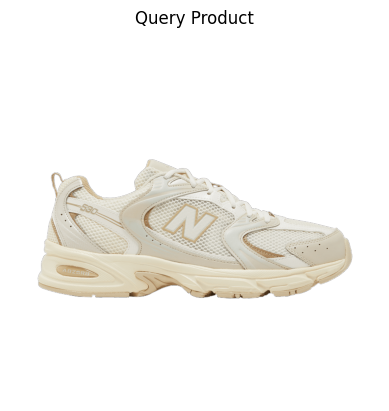

In [52]:
# Display query image (as "Query Product")
query_row = {
    'product_name': 'Query Image',
    'brand': 'N/A',
    'price': 'N/A',
    'discounted_price': 'N/A',
    'price_tier': 'N/A',
    'combined_tier': 'N/A',
    'category': 'N/A',
    'gender': 'N/A',
    'product_url': 'N/A',
    'local_image_path': query_image_path
}
display_product(query_row, title="Query Product")

In [53]:
# Get top 3 similar products
top_products = find_similar_products(query_embedding, top_n=3)

In [54]:
# Display results
for idx, row in top_products.iterrows():
    display_product(row, title="Similar Product")

Similar Product Name: New Balance 530 Cream Beige
Brand: New
Price: 22999.0
Discounted Price: 13796.0
Price Tier: expensive
Combined Tier: expensive
Category: Shoes
Gender: Men
Product URL: https://culture-circle.com/products/all/new-balance-530-cream-beige
Image not found!
Similar Product Name: 530 'Beige Angora'
Brand: 530
Price: 21999.0
Discounted Price: 13705.0
Price Tier: expensive
Combined Tier: expensive
Category: Shoes
Gender: Men
Product URL: https://culture-circle.com/products/all/530-beige-angora-gone53beanshcr_g_mr530aa
Image not found!
Similar Product Name: 1906D 'Protection Pack - White Turtledove'
Brand: 1906D
Price: 27999.0
Discounted Price: 17144.0
Price Tier: expensive
Combined Tier: expensive
Category: Shoes
Gender: Women
Product URL: https://culture-circle.com/products/all/1906d-protection-pack-white-turtledove-gone19prpawhtushwh_g_m1906de
Image not found!
